In [1]:
import pandas as pd

datafile = '/home/matt/data/heart_disease/heart_2020_cleaned.csv'
df = pd.read_csv(datafile)
df.dropna(inplace=True)
df.HeartDisease = df.HeartDisease.map(dict(Yes=1, No=0))
df.Smoking = df.Smoking.map(dict(Yes=1, No=0))
df.AlcoholDrinking = df.AlcoholDrinking.map(dict(Yes=1, No=0))
df.Stroke = df.Stroke.map(dict(Yes=1, No=0))
df.DiffWalking = df.DiffWalking.map(dict(Yes=1, No=0))
df.Sex = df.Sex.map(dict(Female=1, Male=0))
df.Diabetic = df.Diabetic.str[:2]
df.Diabetic = df.Diabetic.map(dict(Ye=1, No=0))
df.PhysicalActivity = df.PhysicalActivity.map(dict(Yes=1, No=0))
df.Asthma = df.Asthma.map(dict(Yes=1, No=0))
df.KidneyDisease = df.KidneyDisease.map(dict(Yes=1, No=0))
df.SkinCancer = df.SkinCancer.map(dict(Yes=1, No=0))
df.AgeCategory = df.AgeCategory.str[:2].astype('int32')
df.iloc[:15]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40,White,0,1,Very good,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,1,75,Black,0,0,Fair,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,1,70,White,0,1,Fair,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,1,80,White,1,0,Good,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,1,80,White,0,0,Fair,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,0,65,White,0,1,Good,10.0,0,0,0


In [2]:
categories = df.select_dtypes(include=['object'])
dummies = pd.get_dummies(categories, drop_first=True)
df.drop(list(categories.columns), axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,55,...,1,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,...,0,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75,...,1,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,40,...,0,0,0,0,0,1,0,0,0,1


In [3]:
print('{:2.2f}% or {} / {} patients have heart disease'.format(
    len(df.loc[df['HeartDisease'] == 1].index)/len(df.index),
    len(df.loc[df['HeartDisease'] == 1].index),
    len(df.index)))

df.groupby('HeartDisease').mean()

0.09% or 27373 / 319795 patients have heart disease


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,...,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
HeartDisease,,,,,,,,,,,,,,,,,,,,,
0,28.224658,0.396246,0.070569,0.026263,2.956416,3.828778,0.117577,0.535428,51.156537,0.117283,...,0.084942,0.026681,0.072532,0.088923,0.034341,0.761588,0.094360,0.285789,0.025439,0.370960
1,29.401592,0.585869,0.041683,0.160340,7.808242,4.641764,0.366346,0.410404,66.162094,0.331166,...,0.181931,0.009718,0.063164,0.052716,0.032368,0.822234,0.258795,0.349176,0.140650,0.196581


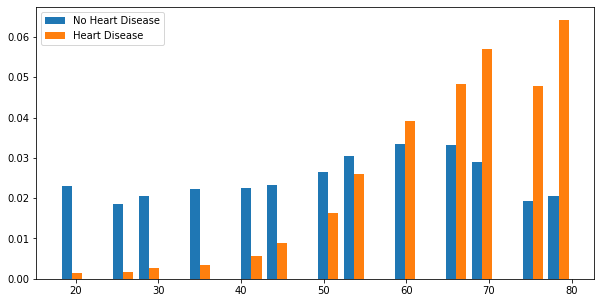

In [4]:
import matplotlib.pyplot as plt

hdvsage_data = [df.loc[df['HeartDisease'] == i]['AgeCategory'].to_numpy() for i in range(df['HeartDisease'].nunique())]

fig = plt.figure(figsize=(10,5))

plt.hist(hdvsage_data, bins=20, density=True, label=['No Heart Disease', 'Heart Disease'])
plt.legend()
plt.show()

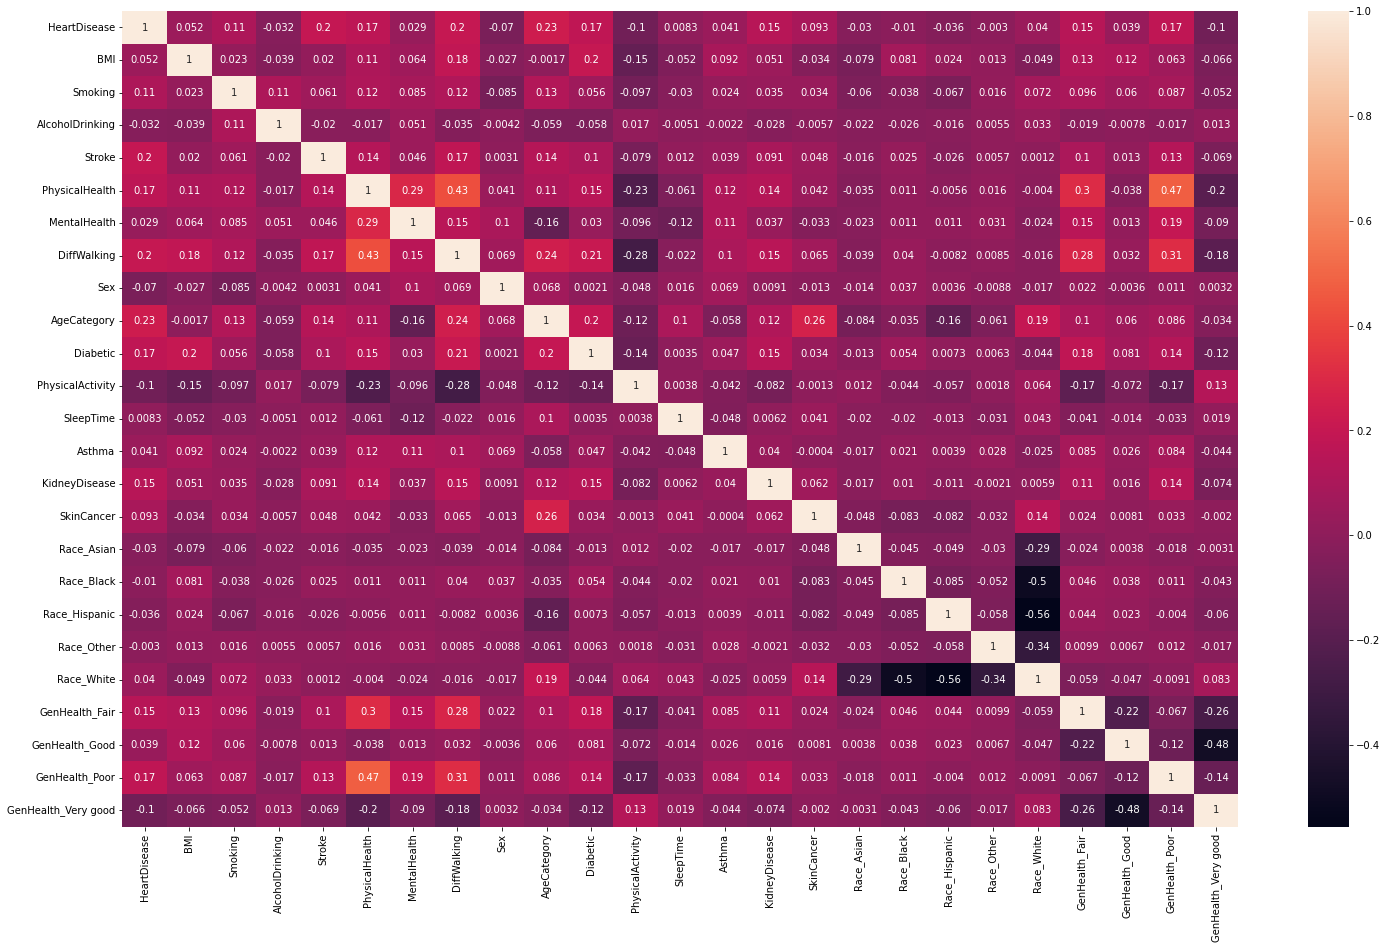

In [5]:
import seaborn as sns

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [6]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

indices2drop = df.loc[df['HeartDisease'] == 0].index.to_numpy()[27373:]

undersampled_df = df.drop(indices2drop)

Y = undersampled_df.pop('HeartDisease')
cols = undersampled_df.columns
X = pd.DataFrame(scale(undersampled_df))
X.columns = cols

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=1)

Training Accuracy: 76.42%
Testing Accuracy: 75.96%


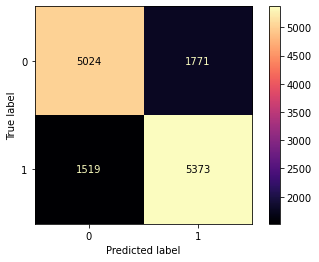

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

clf = LogisticRegression().fit(X_train, Y_train)
print("Training Accuracy: {:2.2f}%".format(clf.score(X_train, Y_train) * 100))
print("Testing Accuracy: {:2.2f}%".format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()

Training Accuracy: 77.85%
Testing Accuracy: 76.01%


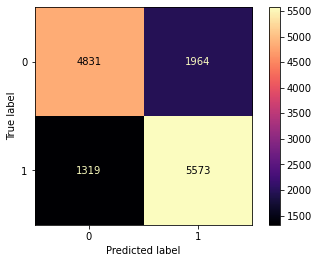

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

clf = SVC(kernel='rbf').fit(X_train, Y_train)
print("Training Accuracy: {:2.2f}%".format(clf.score(X_train, Y_train) * 100))
print("Testing Accuracy: {:2.2f}%".format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()

Training Accuracy: 99.80%
Testing Accuracy: 66.90%


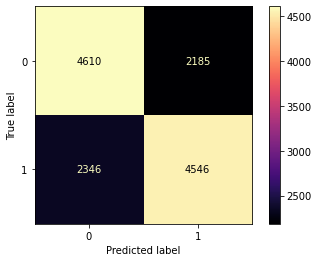

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, Y_train)
print("Training Accuracy: {:2.2f}%".format(clf.score(X_train, Y_train) * 100))
print("Testing Accuracy: {:2.2f}%".format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()

Training Accuracy: 79.13%
Testing Accuracy: 74.98%


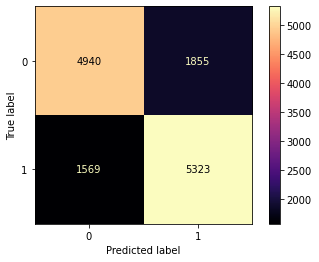

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=250).fit(X_train, Y_train)
print("Training Accuracy: {:2.2f}%".format(clf.score(X_train, Y_train) * 100))
print("Testing Accuracy: {:2.2f}%".format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()